<a href="https://colab.research.google.com/github/vaibhaviwaghaye/NNDL_2022/blob/main/ANN_BankChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
536,537,15592846,Fiorentini,639,Germany,Male,35,10,128173.90,2,1,0,59093.39,0
5676,5677,15568104,Zubarev,749,France,Female,26,6,0.00,2,0,1,34948.77,0
6299,6300,15575679,Lori,590,France,Male,24,7,126431.54,1,1,0,58781.11,0
8926,8927,15709136,Adams,620,France,Male,28,8,0.00,2,1,1,199909.32,0
4338,4339,15798439,Davidson,714,Spain,Male,25,2,0.00,1,1,1,132979.43,0


In [ ]:
df.drop('CustomerId',axis='columns',inplace=True)

In [ ]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
pd.to_numeric(df.EstimatedSalary,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: EstimatedSalary, Length: 10000, dtype: bool

In [ ]:
df[pd.to_numeric(df.EstimatedSalary,errors='coerce').isnull()]

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.shape

(10000, 13)

In [ ]:
df.iloc[345].EstimatedSalary

90908.95

In [ ]:
df[df.EstimatedSalary!=''].shape

(10000, 13)

In [ ]:
df1=df[df.EstimatedSalary!='']
df1.shape

(10000, 13)

In [ ]:
df1.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df1.EstimatedSalary = pd.to_numeric(df1.EstimatedSalary)

In [ ]:
df1.EstimatedSalary.values

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [ ]:
df1[df1.Exited==0]

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.],
        [ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 Lists of Patches objects>)

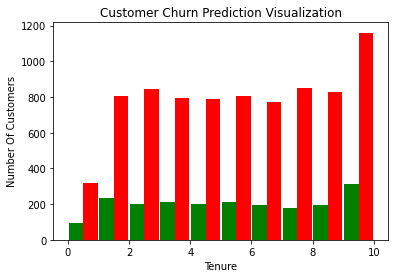

In [ ]:
tenure_churn_no = df1[df1.Exited==0].Tenure
tenure_churn_yes = df1[df1.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_suger_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Exited==1','Exited==0'])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


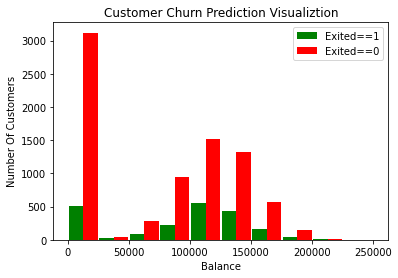

In [ ]:
mc_churn_no = df1[df1.Exited==0].Balance     
mc_churn_yes = df1[df1.Exited==1].Balance   

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Exited==1','Exited==0'])
plt.legend()

In [ ]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.Gender.unique()

array([1, 0])

In [ ]:
df1

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df2 = pd.get_dummies(data=df1, columns=['Surname','Geography'])
df2.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'Surname_Zotova', 'Surname_Zox', 'Surname_Zubarev', 'Surname_Zubareva',
       'Surname_Zuev', 'Surname_Zuyev', 'Surname_Zuyeva', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object', length=2946)

In [ ]:
df2.sample(5)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain
5310,5311,622,0,42,9,115766.26,1,0,0,72155.85,...,0,0,0,0,0,0,0,0,1,0
4564,4565,650,0,23,4,93911.30,2,1,0,69055.45,...,0,0,0,0,0,0,0,0,1,0
5749,5750,844,1,29,8,0.00,2,0,0,147342.03,...,0,0,0,0,0,0,0,1,0,0
2740,2741,650,0,34,4,142393.11,1,1,1,11276.48,...,0,0,0,0,0,0,0,0,1,0
2661,2662,742,1,28,2,191864.51,1,1,0,108457.99,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df2.dtypes

RowNumber            int64
CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
                     ...  
Surname_Zuyev        uint8
Surname_Zuyeva       uint8
Geography_France     uint8
Geography_Germany    uint8
Geography_Spain      uint8
Length: 2946, dtype: object

In [ ]:
cols_to_scale = ['Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 6

In [ ]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(8000, 2945)

In [ ]:
X_test.shape

(2000, 2945)

In [ ]:
X_train[:10]

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain
7751,7752,750,1,39,0.6,0.000000,2,0,0,0.096273,...,0,0,0,0,0,0,0,0,0,1
4154,4155,726,0,34,0.3,0.000000,2,1,0,0.981478,...,0,0,0,0,0,0,0,1,0,0
3881,3882,588,1,64,0.3,0.000000,1,1,1,0.948551,...,0,0,0,0,0,0,0,1,0,0
9238,9239,773,1,50,0.4,0.000000,2,1,0,0.646869,...,0,0,0,0,0,0,0,1,0,0
5210,5211,551,0,35,0.7,0.517012,2,0,0,0.434670,...,0,0,0,0,0,0,0,1,0,0
7487,7488,651,1,56,0.4,0.000000,1,0,0,0.421898,...,0,0,0,0,0,0,0,1,0,0
7542,7543,507,1,34,0.4,0.000000,2,1,1,0.303413,...,0,0,0,0,0,0,0,0,0,1
7524,7525,660,1,40,0.8,0.666330,1,1,1,0.925815,...,0,0,0,0,0,0,0,1,0,0
9412,9413,725,0,26,0.6,0.393324,1,0,0,0.668609,...,0,0,0,0,0,0,0,1,0,0
6377,6378,692,0,33,0.9,0.000000,1,1,0,0.567526,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
len(X_train.columns)

2945

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(2945, input_shape=(2945,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 16s 61ms/step - loss: 1.2490 - accuracy: 0.7805
Epoch 2/100
250/250 [==============================] - 16s 63ms/step - loss: 0.6106 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 15s 61ms/step - loss: 0.5731 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 20s 81ms/step - loss: 0.5480 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 20s 79ms/step - loss: 0.5315 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 15s 59ms/step - loss: 0.5209 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 13s 50ms/step - loss: 0.5143 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 12s 50ms/step - loss: 0.5104 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 13s 50ms/step - loss: 0.5082 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 14s 54ms/step - l

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 18ms/step - loss: 0.5038 - accuracy: 0.7975


[0.5038496255874634, 0.7975000143051147]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.2030679],
       [0.2030679],
       [0.2030679],
       [0.2030679],
       [0.2030679]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

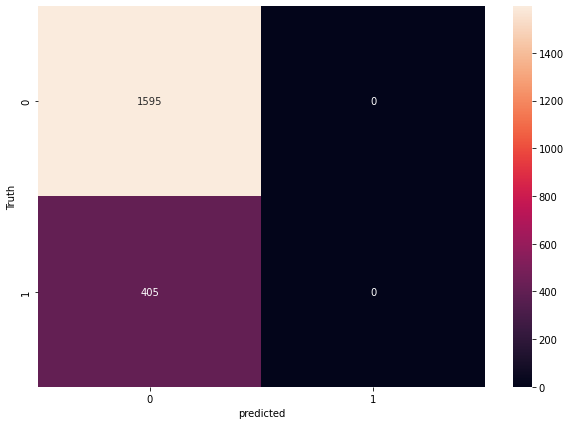

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
y_test.shape

(2000,)

In [ ]:
round((1595+0)/(1595+0+0+405),2)

0.8

In [ ]:
round(1595/(1595+405),2)

0.8